# Weather Prediction using Linear Regression

Mean Squared Error: 0.9033691459940345
R^2 Score: 0.9900860509654806


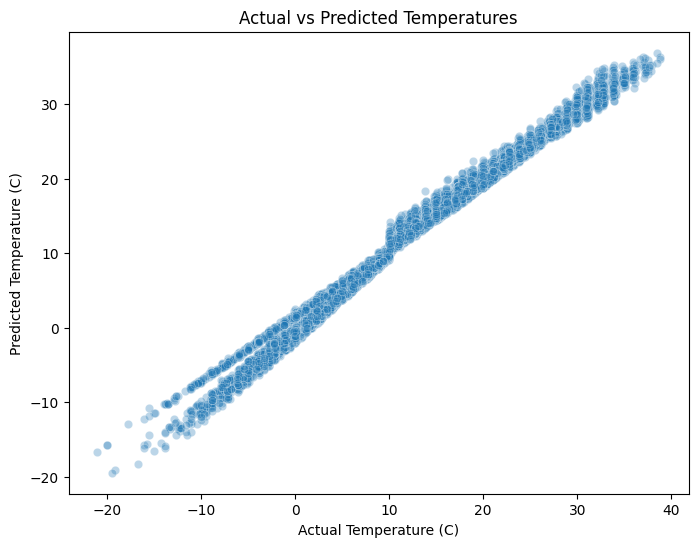

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("weatherHistory.csv")

df_clean = df.drop(columns=['Formatted Date', 'Summary', 'Daily Summary', 'Loud Cover'])
df_clean['Precip Type'] = df_clean['Precip Type'].fillna(df_clean['Precip Type'].mode()[0])

df_clean = df_clean.dropna()
df_clean = df_clean.drop_duplicates()
df_clean = pd.get_dummies(df_clean, columns=['Precip Type'], drop_first=True)

X = df_clean.drop(columns=['Temperature (C)'])
y = df_clean['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Actual vs Predicted Temperatures")
plt.show()
